# init
@author: Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de

## Tasks
- get OpenStreetMap data using the osmnx functionalities in the Overpass API
- clip it to an AOI

## Prerequisites
- have osmnx and geopandas installed
- have an AOI saved as a vector (shapefile or geopackage)

In [1]:
import osmnx as ox
import geopandas as gpd
from pathlib import Path

# imports

In [2]:
#import the AOI
AOI_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
AOI_file = 'JAK_LIM_BoundingBox_AOI_A.shp'
AOI_gdf = gpd.read_file(AOI_path / AOI_file)

In [3]:
#bounds provides minx, miny, maxx, maxy
aoi_coords = AOI_gdf.to_crs(epsg='4326').envelope
bbox_df = gpd.GeoDataFrame(geometry=aoi_coords)
print('N',aoi_coords.bounds.values[0][3],'S',aoi_coords.bounds.values[0][1],'W',aoi_coords.bounds.values[0][0],'E',aoi_coords.bounds.values[0][2])

N -5.924775462093303 S -6.78749996341632 W 106.25833288099368 E 107.23811669088865


<Axes: >

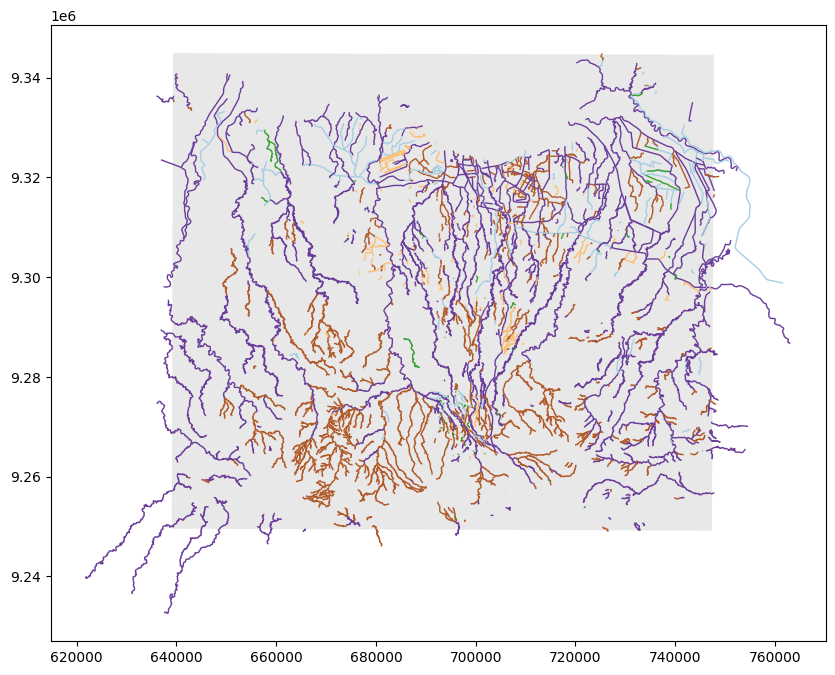

In [7]:
#get waterway linear  features from OSM
# List key-value pairs for tags
tags = {'waterway': ['river', 'stream', 'tidal_channel', 'canal', 'drain', 'ditch', 
                     'pressurised','fairway','fish_pass','canoe_pass']} # see full list of classes at https://wiki.openstreetmap.org/wiki/Waterways
col_list = ['osmid','waterway','intermittent','usage','geometry'] #OSM has hundreds of cols, we just want a few. 

water_linear = ox.features_from_bbox(north=aoi_coords.bounds.values[0][3],
                              south=aoi_coords.bounds.values[0][1],
                              west=aoi_coords.bounds.values[0][0],
                              east=aoi_coords.bounds.values[0][2],
                              tags=tags)
water_linear.reset_index(inplace=True)

#filtering out the wrong geometries (POLYGON or POINT) and element types (NODE)
water_linear = water_linear.loc[(water_linear.geometry.type=='LineString'), col_list] #&(water_linear.element_type == 'way')
#convert the CRS of roads to the same as AOI
water_linear.to_crs(AOI_gdf.crs,inplace=True)

#plot them
water_linear.plot('waterway',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', linewidth=1, zorder=2)

<Axes: >

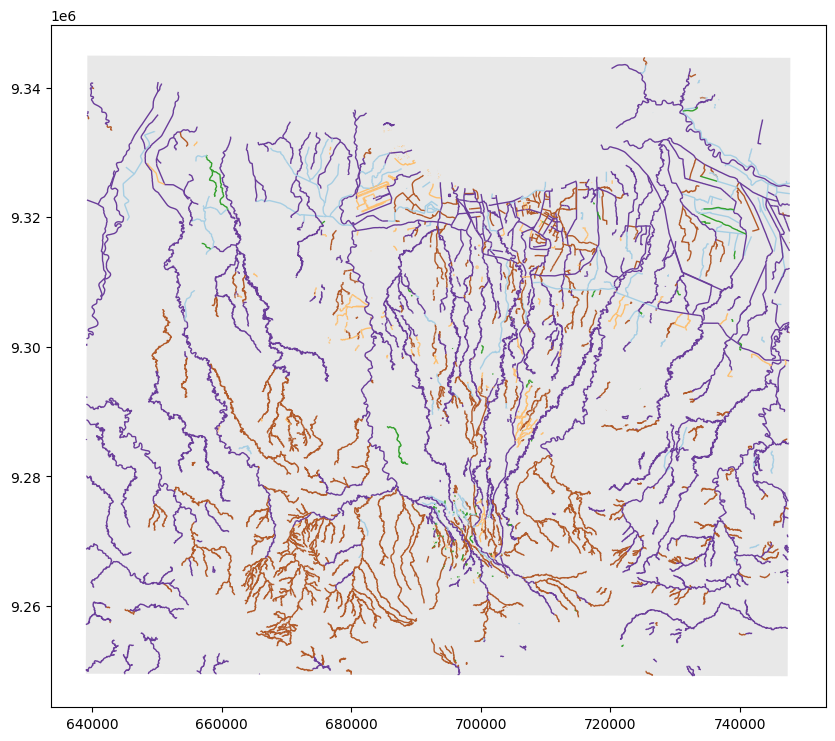

In [8]:
#clip using geopandas, the mask is the AOI we imported above
water_clipped_gdf = gpd.clip(water_linear, mask=AOI_gdf, keep_geom_type=True)
water_clipped_gdf.plot('waterway',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', linewidth=1, zorder=2)

<Axes: >

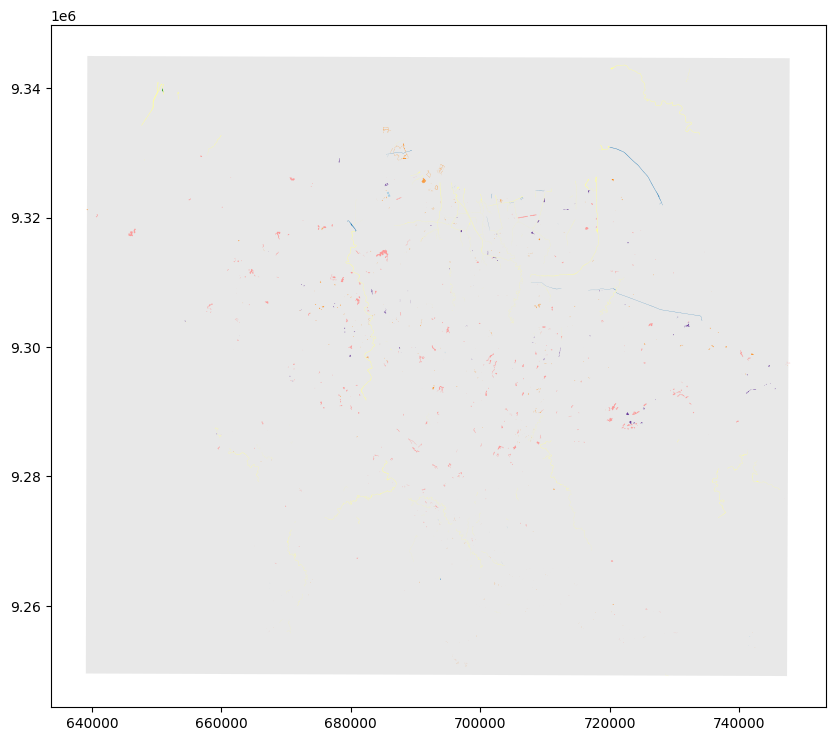

In [14]:
#get waterway area features from OSM
# List key-value pairs for tags
tags = {'water': ['lagoon','lake','oxbow','rapids','river','stream','stram_pool',
                  'basin','canal', 'ditch', 'fish_pass','harbour', 'lock', 'moat', 
                  'pond', 'reflecting_pool', 'reservoir', 'wastewater']} # see full list of classes at https://wiki.openstreetmap.org/wiki/Key:water
col_list = ['osmid','water','natural','source','geometry','name'] #OSM has hundreds of cols, we just want a few. 

water_area = ox.features_from_bbox(north=aoi_coords.bounds.values[0][3],
                              south=aoi_coords.bounds.values[0][1],
                              west=aoi_coords.bounds.values[0][0],
                              east=aoi_coords.bounds.values[0][2],
                              tags=tags)
water_area.reset_index(inplace=True)

#filtering out the wrong geometries (POLYGON or POINT) and element types (NODE)
water_area = water_area.loc[(water_area.geometry.type=='Polygon'), col_list] #&(water_linear.element_type == 'way')
#convert the CRS of roads to the same as AOI
water_area.to_crs(AOI_gdf.crs,inplace=True)

#plot them
water_area.plot('water',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', linewidth=1, zorder=2)

<Axes: >

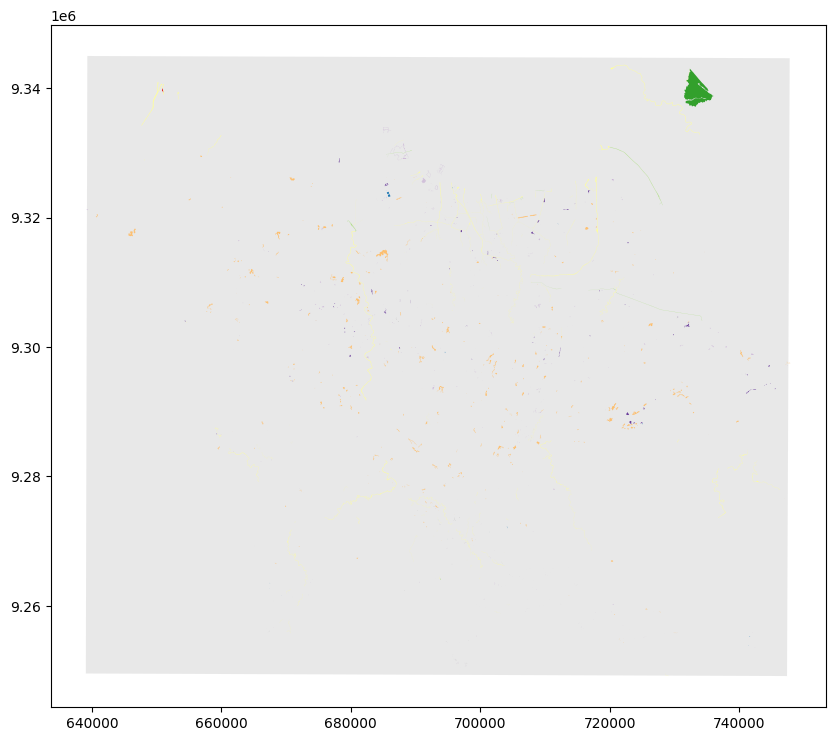

In [16]:
#get waterway area features from OSM
# List key-value pairs for tags
tags = {'natural': ['water','coastline']} # see full list of classes at https://wiki.openstreetmap.org/wiki/Key:water
col_list = ['osmid','water','natural','source','geometry','name'] #OSM has hundreds of cols, we just want a few. 

water_area = ox.features_from_bbox(north=aoi_coords.bounds.values[0][3],
                              south=aoi_coords.bounds.values[0][1],
                              west=aoi_coords.bounds.values[0][0],
                              east=aoi_coords.bounds.values[0][2],
                              tags=tags)
water_area.reset_index(inplace=True)

#filtering out the wrong geometries (POLYGON or POINT) and element types (NODE)
water_area = water_area.loc[(water_area.geometry.type=='Polygon'), col_list] #&(water_linear.element_type == 'way')
#convert the CRS of roads to the same as AOI
water_area.to_crs(AOI_gdf.crs,inplace=True)

#plot them
water_area.plot('water',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', linewidth=1, zorder=2)

# export

In [17]:
#export roads  to a shapefile
water_clipped_gdf.to_file(AOI_path / 'JAK_HYD_waterways_linear_OSM_2024_L.shp')

C:\Users\ra42zek\AppData\Local\Temp\ipykernel_29388\1591725679.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  water_clipped_gdf.to_file(AOI_path / 'JAK_HYD_waterways_linear_OSM_2024_L.shp')


In [18]:
#export places to a shapefile
water_area.to_file(AOI_path / 'JAK_HYD_waterways_area_OSM_2024_A.shp')